# Interpolation (Newton-Verfahren)

Gesucht ist ein Polynom $f$, das durch folgende Punkte geht.

In [11]:
z = [(-2,0), (-1,3), (0,-6), (1,3), (2,60)]
z

[(-2, 0), (-1, 3), (0, -6), (1, 3), (2, 60)]

Dies ist möglich mit einem Polynom von Grad $n$ mit

In [12]:
n = len(z) - 1
n

4

Gesucht sind also $n$ Zahlen, die das Polynom festlegen. Diese sollen dann in $a$ eingetragen werden

In [13]:
a = [None] * n
a

[None, None, None, None]

Schrittweise konstruiert man das gesuchte Polynom: $f$ muss zunächst durch den ersten Punkt $(x_0,y_0)$ gehen
$$y_0 = f(x_0) = b_0$$
Das lässt sich als Polynom $g_0$ vom Grad 0 ausdrücken.

In [14]:
# Wert berechnen
a[0] = z[0][1]

# Funktion definieren
def g0(x):
    y = a[0] + (x-x)
    return(y)

# Ergebnisse anzeigen    
[a[0], g0(-2)]

[0, 0]

Zusätzlich muss $f$ durch den zweiten Punkt $(x_1,y_1)$ gehen (und trotzdem noch durch $(x_0,y_0)$)
$$y_1 = f(x_1) = b_0 + b_1(x_1 - x_0) = g_1(x_1) + b_1(x_1 - x_0)$$
Also
$$b_1 = \frac{y_1 - g_0(x_1)}{x_1 - x_0}$$
Definiere dann ein neues Polynom $g_1$ vom Grad 1, dass durch beide Punkte geht.

In [15]:
a[1] = (z[1][1] - g0(z[1][0]))/(z[1][0] - z[0][0])

def g1(x):
        y = a[0] + a[1]*(x - z[0][0])
        return(y)

[a[1], g1(-2),g1(-1)]      

[3.0, 0.0, 3.0]

Zusätzlich muss $f$ durch den dritten Punkt $(x_2,y_2)$ gehen (und trotzdem noch durch $(x_0,y_0)$ und $(x_1,y_1)$)
$$y_2 = f(x_2) = b_0 + b_1(x_2 - x_0) + b_2(x_2 - x_0)(x_2 - x_1)$$
Also
$$b_2 = \frac{y_2 - g(x_2)}{(x_2 - x_0)(x_2 - x_1)}$$
Definiere dann ein neues Polynom $g_2$ vom Grad 2, dass durch alle drei Punkte geht.

In [16]:
a[2] = (z[2][1] - g1(z[2][0]))/((z[2][0] - z[0][0])*(z[2][0] - z[1][0]))

def g2(x):
    y = a[0] + a[1]*(x - z[0][0]) + a[2]*(x - z[1][0])*(x - z[0][0])
    return(y)   

[a[2], g2(-2), g2(-1), g2(0)]

[-6.0, 0.0, 3.0, -6.0]

Darstellung der Werte und von $g_1$, $g_2$, $g_3$:

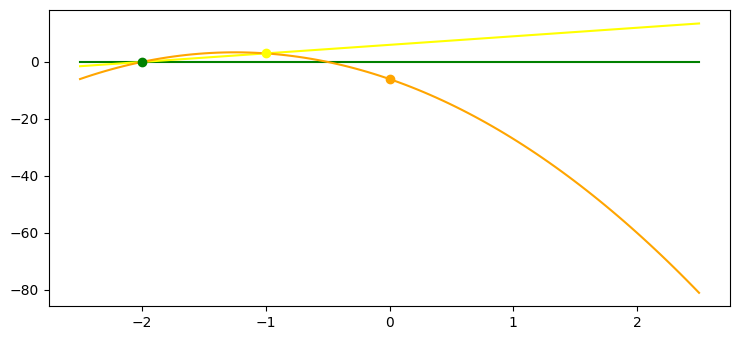

In [17]:
# Funktionen importieren
import numpy as np
from matplotlib import pyplot as plt

# Layout festlegen
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# x-Werte generieren
x = np.linspace(-2.5, 2.5, 100)

# Plot
plt.plot(x, g0(x), color='green')
plt.plot(x, g1(x), color='yellow')
plt.plot(x, g2(x), color='orange')
plt.plot(z[0][0], z[0][1], marker = 'o', color = 'green')
plt.plot(z[1][0], z[1][1], marker = 'o', color = 'yellow')
plt.plot(z[2][0], z[2][1], marker = 'o', color = 'orange')
plt.show()

**Aufgabe:**

Wie bestimmt man den nächsten Wert ($a_3$)? Als Formel, als Code?

**Zusatz:**

Funktion, die den Algorithmus für beliebige $z$ ausführt und die entstehenden Polynome plottet.

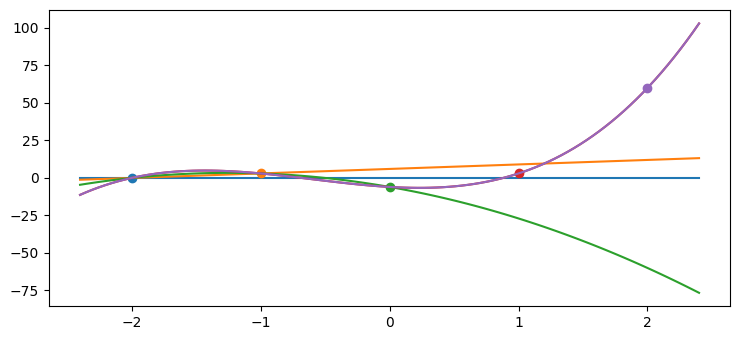

[0.0, 3.0, -6.0, 5.0, 0.0]

In [18]:
def newton(z):
    # Berechnung der Koeffizienten
    n = len(z)
    a = [None]*n 
    
    for i in range(n):
        g = 0
        h = 1
        if i > 0:
            for j in reversed(range(i)):
                d = (z[i][0] - z[j][0])
                h  = h * d
                g = g*d + a[j]
                
        a[i] = (z[i][1] - g)/h
        
    # Plot Initialisierung
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    x0 = res_list = [x[0] for x in z]
    x = np.linspace(min(x0) - d/10, max(x0) + d/10, 100)

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    # Definition und Plot der Polynome der Grade 0, ..., n
    for i in range(len(z)):
        def g(x):
            gg = [a[i]]*len(x)
            for j in reversed(range(i)):
                gg = gg * (x - z[j][0]) + a[j]
            return(gg)  
        plt.plot(x, g(x), color = colors[i])
        plt.plot(z[i][0], z[i][1], marker = 'o', color = colors[i])    
    plt.show()    
    return(a)

a = newton(z)
a

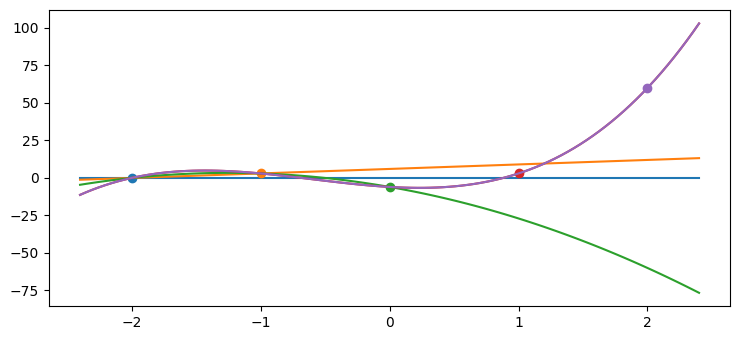

[0.0, 3.0, -6.0, 5.0, 0.0]

In [19]:
def newton(w):
    # Berechnung der Koeffizienten
    n = len(w)
    a = [None]*n 
    
    for i in range(n):
        g = 0
        h = 1
        if i > 0:
            for j in reversed(range(i)):
                d = (w[i][0] - w[j][0])
                h  = h * d
                g = g*d + a[j]
                
        a[i] = (w[i][1] - g)/h
        
    # Plot Initialisierung
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']

    x0 = res_list = [x[0] for x in w]
    x = np.linspace(min(x0) - abs(d)/10, max(x0) + abs(d)/10, 100)

    plt.rcParams["figure.figsize"] = [7.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    
    # Definition und Plot der Polynome der Grade 0, ..., n
    for i in range(len(w)):
        def g(x):
            gg = [a[i]]*len(x)
            for j in reversed(range(i)):
                gg = gg * (x - w[j][0]) + a[j]
            return(gg)  
        plt.plot(x, g(x), color = colors[i])
        plt.plot(w[i][0], w[i][1], marker = 'o', color = colors[i])    
    plt.show()    
    return(a)

a = newton(z)
a

Die Funktion lässt sich auch auf andere Mengen von Punkten anwenden, z.B. die gleichen Punkte in anderer Reihenfolge. Das Polynom vom Grad $n$, das durch alle Punkte geht, ist gleich.

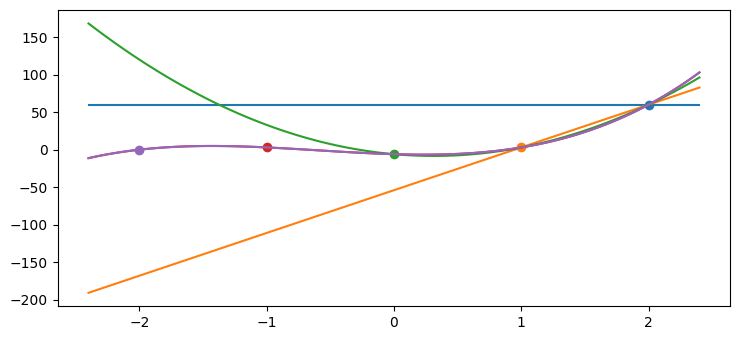

[60.0, 57.0, 24.0, 5.0, 0.0]

In [20]:
u = [(2,60), (1,3), (0,-6), (-1,3), (-2,0)]
a = newton(u)
a